# Web Complexity

## Importing Files

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
from operator import itemgetter 
sys.path.append(os.getcwd())
from clean import cleanArr

In [4]:
!pip install tldextract

In [3]:
with open("./output.json") as file:
    websites = json.load(file)
website_len=len(websites)
websites, mime_list, buckets_category, rank_arr=cleanArr(websites)
website_len=len(websites)
print("Filtered {} websites".format(website_len))
print("Found MIME types {}".format(list(mime_list.keys())))
print("Found Category types {}".format(list(buckets_category.keys())))

Filtered 295 websites
Found MIME types ['css', 'javascript', 'image', 'json', 'video', 'font', 'audio']
Found Category types ['Entertainment', 'Business/Economy', 'Technology/Internet', 'Health', 'Suspicious', 'News', 'Education', 'Sports/Recreation', 'Shopping', 'Society/Daily Living', 'Audio/Video Clips', 'Government/Legal', 'Reference', 'Real Estate', 'Charitable/Non-Profit', 'Gambling', 'Newsgroups/Forums', 'Pornography', 'Finance', 'Office/Business Applications', 'Travel', 'Restaurants/Food', 'Software Downloads', 'TV/Video Streams', 'Social Networking', 'Media Sharing', 'Games', 'Brokerage/Trading', 'Phishing', 'Job Search/Careers', 'Political/Social Advocacy', 'Search Engines/Portals', 'Mixed Content/Potentially Adult', 'Alternative Spirituality/Belief', 'Placeholders', 'Malicious Sources/Malnets', 'Vehicles', 'Personal Sites', 'Adult/Mature Content', 'Art/Culture']


## A Glimpse of Generated Data

In [4]:
rank_arr.sort(key=lambda x:x[0])
print("{}: Max Rank".format(rank_arr[len(rank_arr)-1]))

(997982, 511): Max Rank


## Separating Websites into Buckets
Because we didnt have the complete means to collect the data, we've not been able to 

In [5]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def buckets_generate(arr,count):
    old_chunk=[]
    for i in range(0,website_len,10):
        chunk=list(chunks(arr,website_len-i))
        if(len(old_chunk)>=count and len(chunk)!=len(old_chunk)):
            return old_chunk
        old_chunk=chunk

In [6]:
buckets=buckets_generate(rank_arr,4)
bucketdetails=[]
for index,bucket in enumerate(buckets):
    print("Bucket {}: {} websites from rank {} to {}".format(index,len(bucket),min(bucket[0][0],bucket[len(bucket)-1][0]),max(bucket[0][0],bucket[len(bucket)-1][0])))
    bucketdetails.append((min(bucket[0][0],bucket[len(bucket)-1][0]),max(bucket[0][0],bucket[len(bucket)-1][0])))

Bucket 0: 75 websites from rank 1 to 80837
Bucket 1: 75 websites from rank 82214 to 189384
Bucket 2: 75 websites from rank 190229 to 517422
Bucket 3: 70 websites from rank 520359 to 997982


## Content Complexity
### Number of Object Requests Made

In [7]:
# https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php
def num_of_req(bucket,x_arr):
    for b_det in bucket:
        count=0
        site=websites[b_det[1]]
        for req in site["reqdetails"]:
            count+=req["method"]=="GET"
#         print("{} websites {} GET requests".format(site["name"],count))
        x_arr.append((site["name"], count, site["rank"]))
#     arr.append(x_arr)

In [8]:
num_req_arr=[]
for bucket in buckets:
    arr=[]
    num_of_req(bucket,arr)
    num_req_arr.append(arr)

IndexError: list index out of range

In [225]:
def retrieve(lst,index): 
    return list(list(zip(*lst))[index])

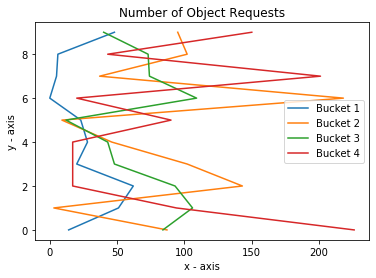

In [226]:
# line 1 points

for index in range(len(buckets)):
    x1 = retrieve(num_req_arr[index],1)[:10]
    y1 = [i for i in range(0,len(x1))]
# plotting the line 1 points 
    plt.plot(x1, y1, label = "Bucket "+str(index+1))

plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Number of Object Requests')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Types Of Object Requested
#### By Category

In [11]:
bucket=list(mime_list.keys())[0]
bucket

'css'

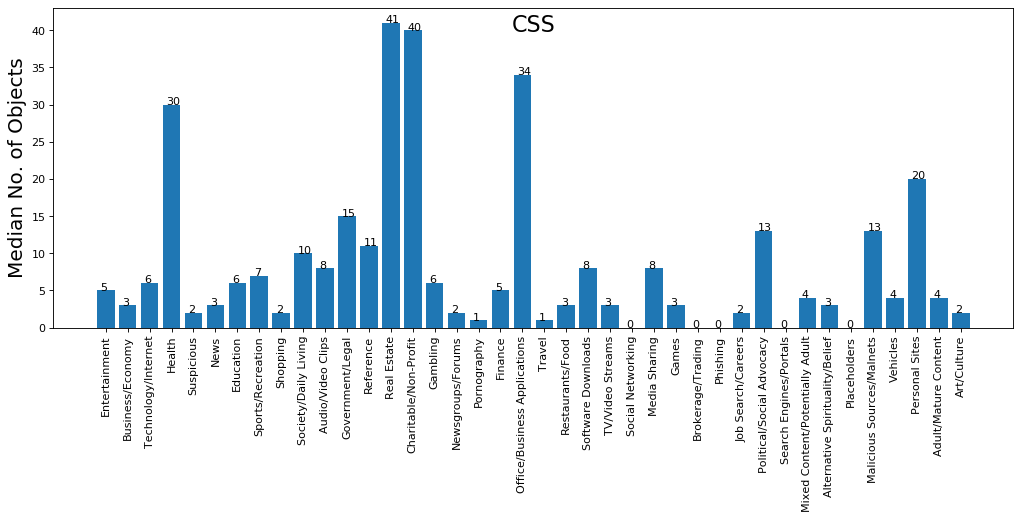

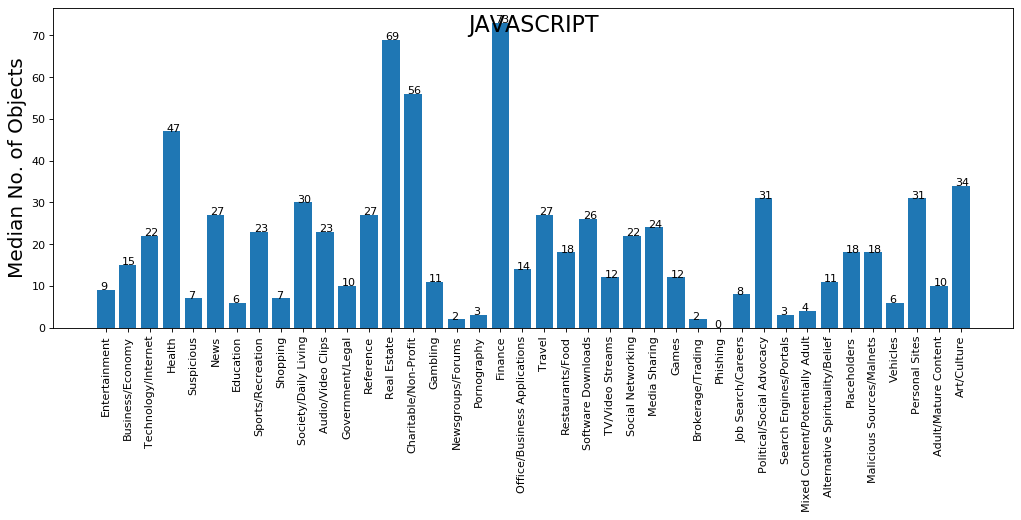

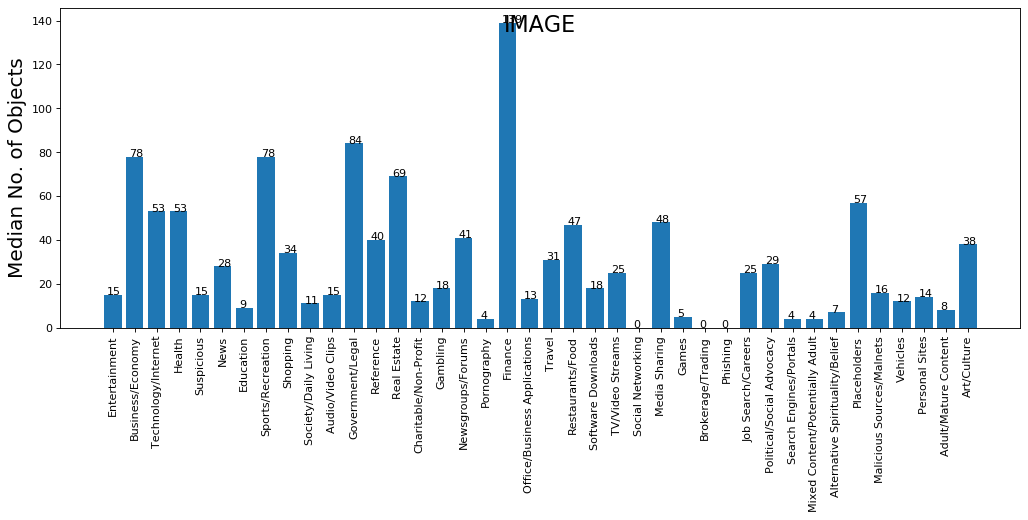

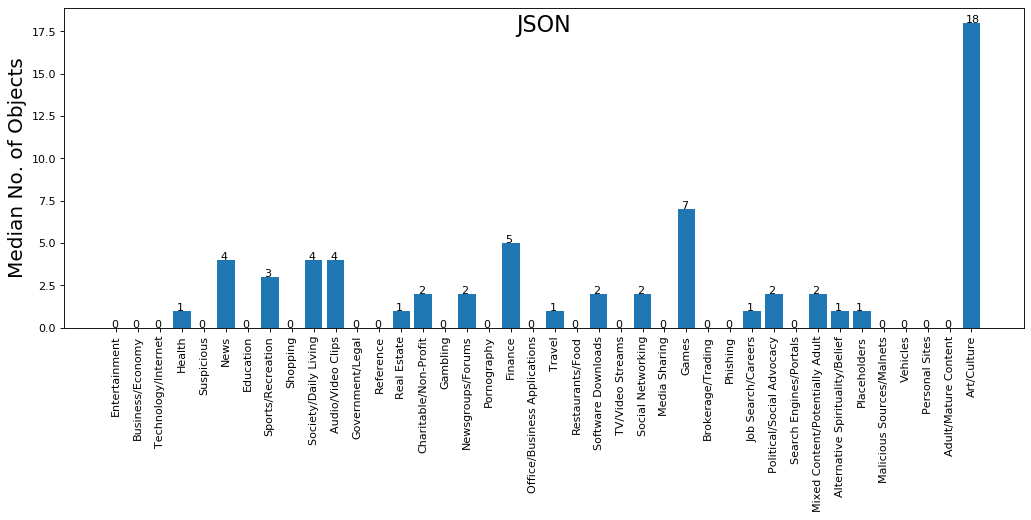

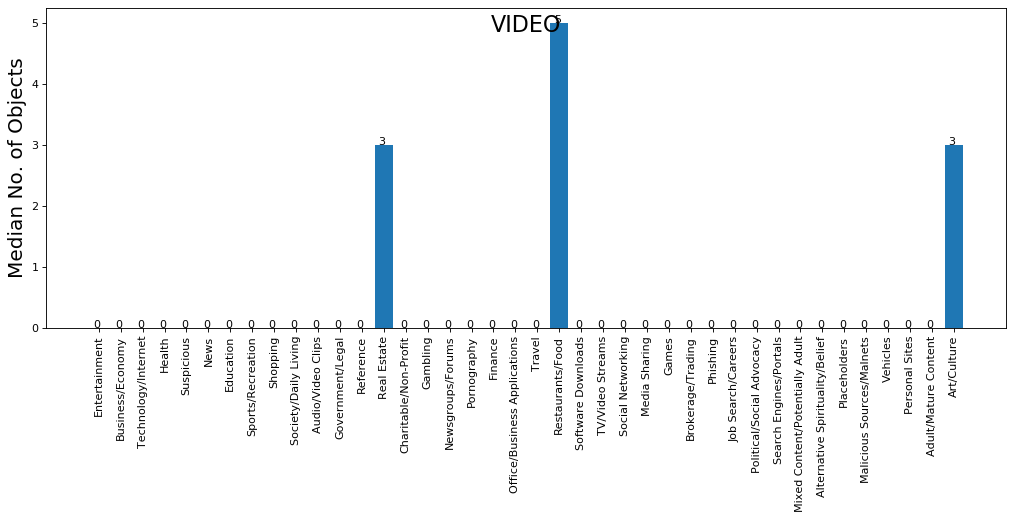

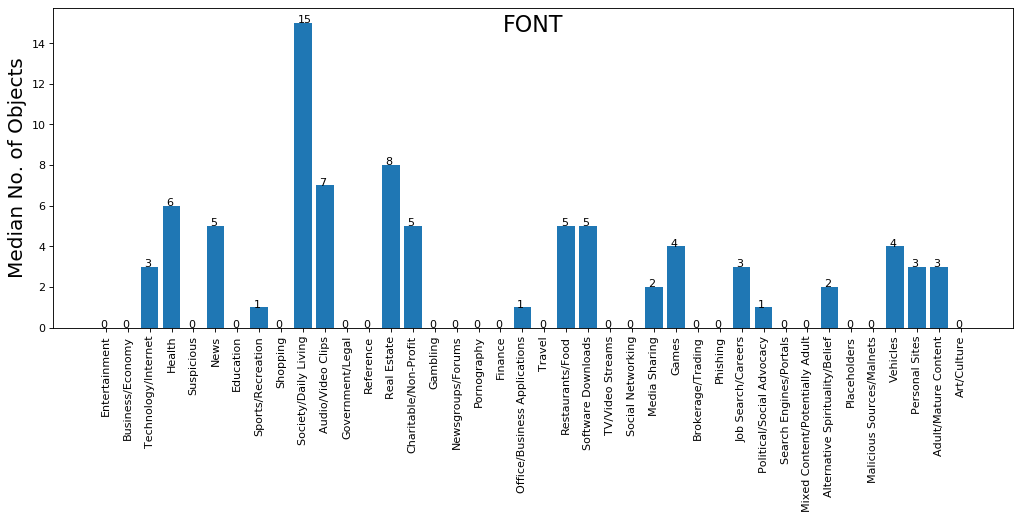

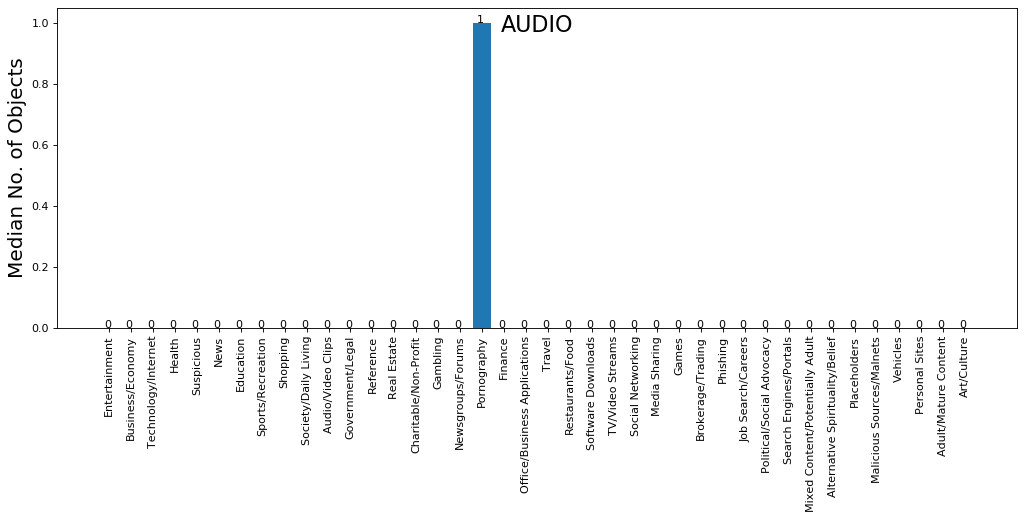

In [124]:
def mime_by_category():
    mime_median_hash={}
    for mime in mime_list.keys():
        category_hash={}
        for site in websites:
            objcount=0
            for req in site["reqdetails"]:
                objcount+=(req['mimeType']==mime)
#             if(objcount>0):
            try:
                category_hash[site['category']].append(objcount)
            except:
                category_hash[site['category']]=[objcount]

            for c in category_hash.keys():
                category_hash[c]=np.median(np.array(category_hash[c]))
#             mime_median_hash[mime]= dict(sorted(category_hash.items(), key = itemgetter(1), reverse = True)) 
            mime_median_hash[mime]= category_hash
    # print(mime_median_hash)     
    return mime_median_hash

m=mime_by_category()
for mime in m.keys():
    fig = plt.figure(figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_axes([0,0,1,1])
    fig.suptitle(mime.upper(), fontsize=20)
    fig_x = m[mime].keys()
    fig_y = m[mime].values()
    plt.ylabel('Median No. of Objects', fontsize=18)
    ax.bar(fig_x,fig_y)
    plt.xticks(range(len(fig_x)), fig_x, rotation=90)
    for i, v in enumerate(fig_y):
        ax.text(i-0.25,v , str(int(v)))
    plt.show()

### Bytes Downloaded
#### By Category

In [134]:
def mime_bytes_by_category():
    mime_median_hash={}
    for mime in mime_list.keys():
        category_hash={}
        for site in websites:
            objcount=total_for_mime=0
            for req in site["reqdetails"]:
                total_for_mime+=req['responseSize']
                if(req['mimeType']==mime):
                    try:
                        category_hash[site['category']]+=req['responseSize']
                    except:
                        category_hash[site['category']]=req['responseSize']
            try:
                category_hash[site['category']]/=total_for_mime
            except:
                category_hash[site['category']]=0
            category_hash[site['category']]=round(float(category_hash[site['category']]),2)
            mime_median_hash[mime]= category_hash 
    return mime_median_hash

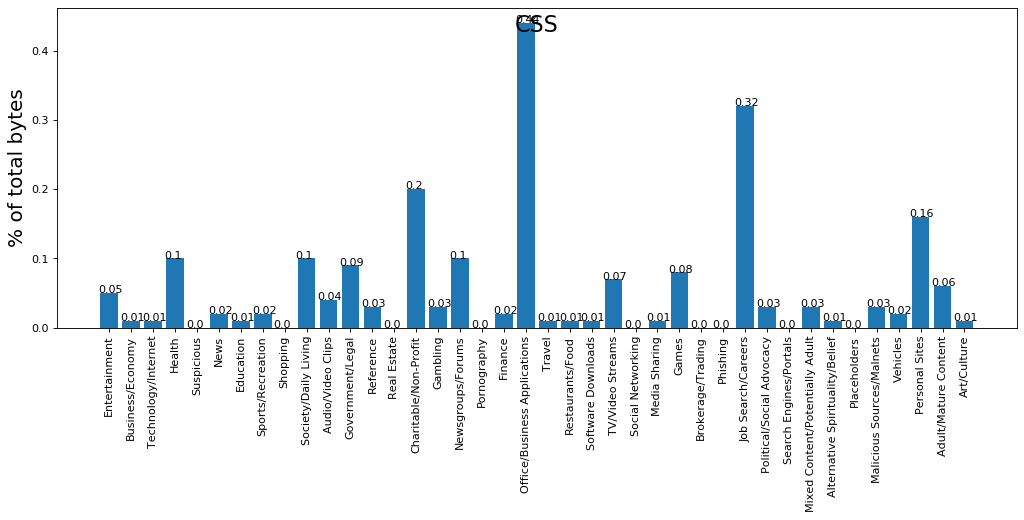

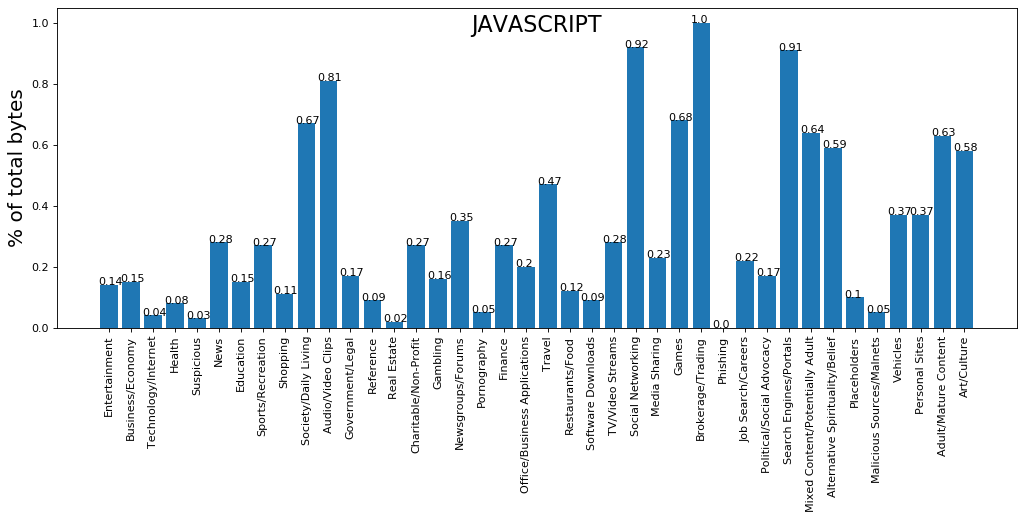

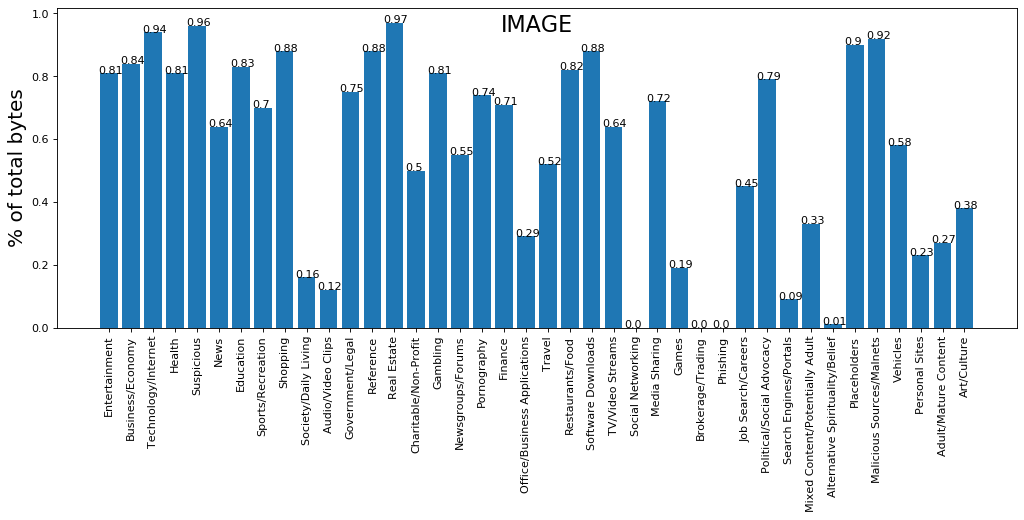

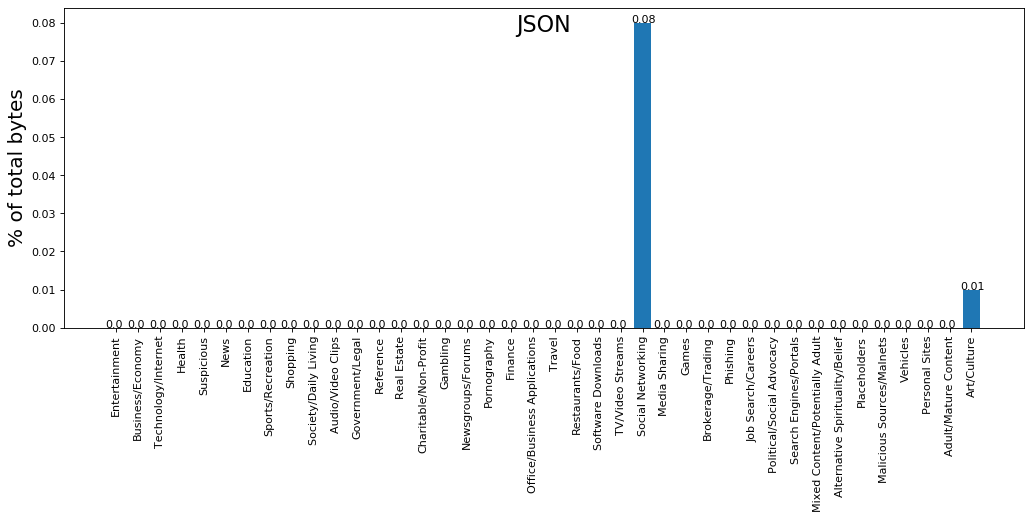

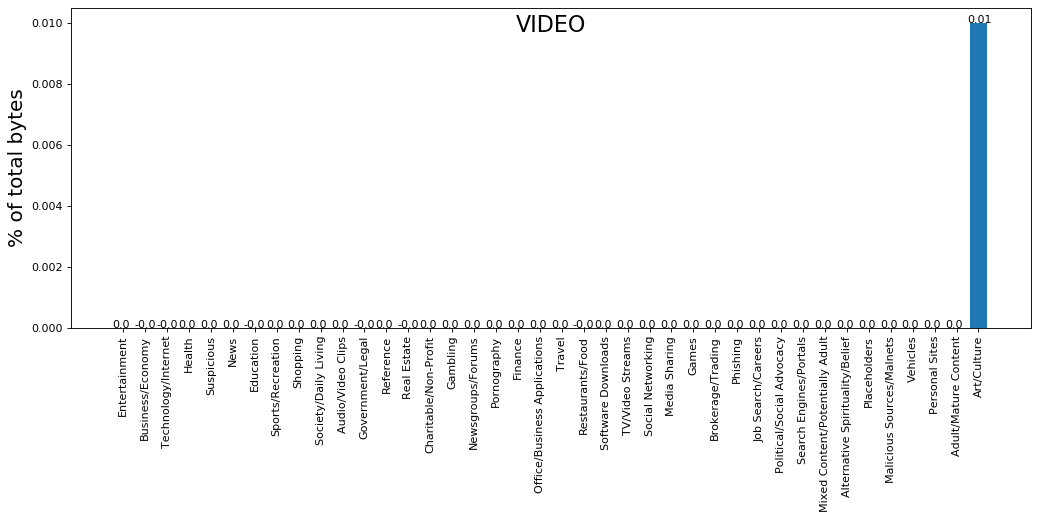

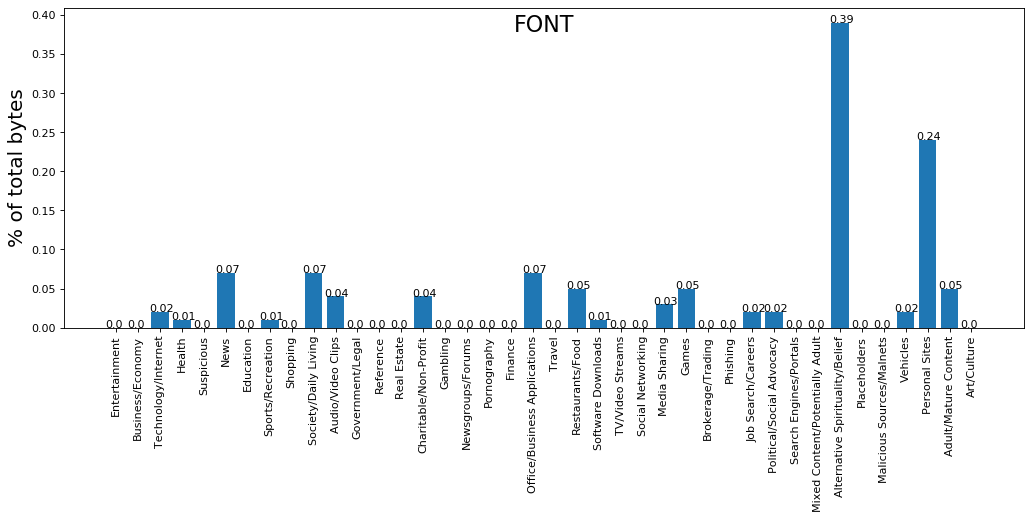

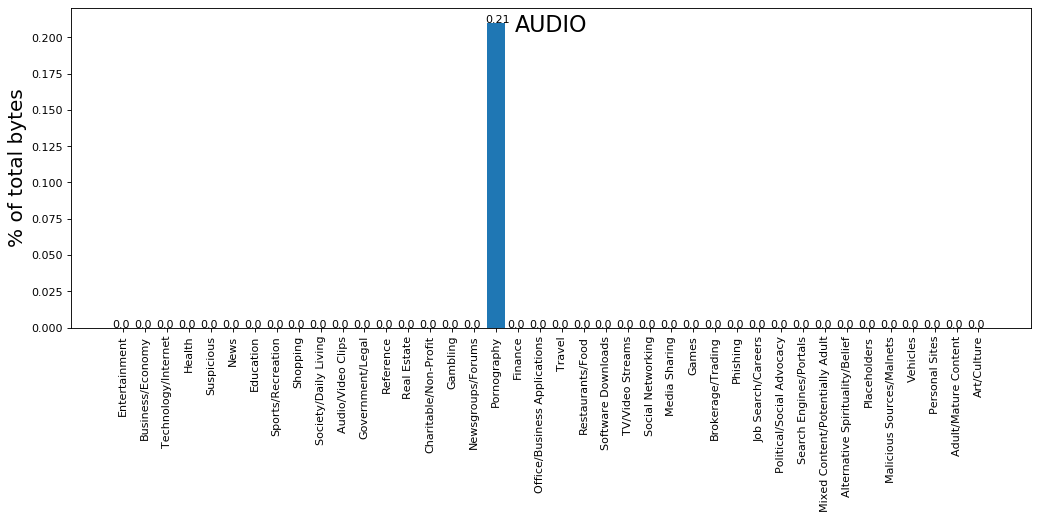

In [141]:
mbc=mime_bytes_by_category()
for mime in mbc.keys():
    fig = plt.figure(figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_axes([0,0,1,1])
    fig.suptitle(mime.upper(), fontsize=20)
    fig_x = mbc[mime].keys()
    fig_y = mbc[mime].values()
    plt.ylabel('% of total bytes', fontsize=18)
    ax.bar(fig_x,fig_y)
    plt.xticks(range(len(fig_x)), fig_x, rotation=90)
    for i, v in enumerate(fig_y):
        ax.text(i-0.5,v , str(v))
    plt.show()

## Analyzing Non-Origin Sources
### Breakdown of Types of Services provided by Non-Origins

In [23]:
with open('nonorigin.json') as json_file:
    non_origin=json.load(json_file)
no_cat={}
for x in non_origin.keys():
    category=non_origin[x]['category']
    found_count=non_origin[x]['found_count']
    if category not in no_cat:
        no_cat[category]={'cat_count':1,'found_count':found_count}
    else:
        no_cat[category]['cat_count']+=1
        no_cat[category]['found_count']+=found_count
non_origin_cat_arr=[]
for n in no_cat.keys():
    if(n!='Unclassified'):
        non_origin_cat_arr.append([n,no_cat[n]['cat_count'],no_cat[n]['found_count']])

non_origin_cat_df=pd.DataFrame(non_origin_cat_arr,columns=["Type of Service","Number","Found in no. of origins"])
non_origin_cat_df.set_index('Number',inplace=True)
non_origin_cat_df.sort_values(by=["Found in no. of origins"],inplace=True,ascending=False)
non_origin_cat_df

,Type of Service,Found in no. of origins
Number,,
5,Search Engines/Portals,1274
6,Web Ads/Analytics,1051
11,Content Delivery Networks,1030
4,Technology/Internet,489
3,Social Networking,398
1,Audio/Video Clips,153
2,Shopping,127
2,News,124
1,Business/Economy,72


### Classification of Services Provided by Top 10 Non Origin Services

In [10]:
non_origin_arr=[]
for n in non_origin.keys():
    nx=non_origin[n]
    if(nx['rank']!='N/A'):
        non_origin_arr.append([n,nx['rank'],nx['probability'],nx['category']])
non_origin_df=pd.DataFrame(non_origin_arr,columns=['Website Name','Rank','Fraction of Sites','Category'])
non_origin_df.set_index('Rank',inplace=True)
non_origin_df.sort_values(by=['Fraction of Sites'],inplace=True,ascending=False)
non_origin_df.head(10)

,Website Name,Fraction of Sites,Category
Rank,,,
720,gstatic.com,0.0663,Search Engines/Portals
1,google.com,0.0476,Search Engines/Portals
968,googleapis.com,0.0366,Technology/Internet
50,google-analytics.com,0.0356,Web Ads/Analytics
93,googlesyndication.com,0.0303,Web Ads/Analytics
307,twimg.com,0.0296,Content Delivery Networks
19,doubleclick.net,0.0281,Web Ads/Analytics
95,google.co.in,0.0271,Search Engines/Portals
178,facebook.net,0.0237,Social Networking


## Which of the above metrics has highest impact on perfor